GENERAL CODE FOR ABS ASSESMENT: LUIS, WILL, SHARIF, PHIL

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

def get_file(url):
    result = requests.get(url).json()
    final = pd.DataFrame(result)
    return final

#SETTING API SOURCES
c_summary = get_file("https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,EMP,PAYANN,RCPPDEMP,YIBSZFI,YIBSZFI_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,FIRMPDEMP&for=state:*&NAICS2017=00&key=a35b0cab138563036a49e8b976188a8c0e170e25")
char_business = get_file("https://api.census.gov/data/2018/abscb?get=NAME,GEO_ID,NAICS2017_LABEL,EMP,PAYANN,RCPPDEMP,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,FIRMPDEMP&for=state:*&NAICS2017=00&BUSCHAR=A1&QDESC=B01&key=a35b0cab138563036a49e8b976188a8c0e170e25")
char_business_owners = get_file("https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,OWNPDEMP&for=state:*&OWNCHAR=CG&NAICS2017=00&QDESC=O02&key=a35b0cab138563036a49e8b976188a8c0e170e25")
tech_char = get_file("https://api.census.gov/data/2018/abstcb?get=NAME,GEO_ID,NAICS2017_LABEL,EMP,FACTORS_P,IMPACTWF_P_LABEL,IMPACTWF_U_LABEL,FACTORS_U,PAYANN,MOTUSETECH,MOTUSETECH_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,TECHUSE,TECHUSE_LABEL,FIRMPDEMP&for=state:*&NAICS2017=00&key=a35b0cab138563036a49e8b976188a8c0e170e25")

#REPLACING COLUMNS WITH 1ST ROW NAMES
c_summary.columns = c_summary.iloc[0]
char_business.columns = char_business.iloc[0]
char_business_owners.columns = char_business_owners.iloc[0]
tech_char.columns = tech_char.iloc[0]

#REMOVING UNESSECARY ROW AFTER RENAMING COLUMNS
c_summary = c_summary.drop(c_summary.index[0])
char_business = char_business.drop(char_business.index[0])
char_business_owners = char_business_owners.drop(char_business_owners.index[0])
tech_char = tech_char.drop(tech_char.index[0])

BELOW IS INDIVIDUAL CODE MEMBER'S SECTIONS THAT FOLLOWS THE GENERAL CODE PROVIDED ABOVE

PLEASE ADD YOUR PART OF CODE IN A SEPERATE CELL. PLEASE BE MINDFUL AND DO NOT DEMAGE OTHER MEMBER'S CODE. 

LUIS:

This is where I do my merging:

In [2]:
# c_summary 
# char_business 
# char_business_owners
# tech_char


c_summary_char_business = c_summary.merge(char_business, how = 'left', on = 'NAME')

c_summary_char_business_and_owners = c_summary_char_business.merge(char_business_owners, how='left', on = 'NAME')

c_summary_char_business_and_owners_and_tech = c_summary_char_business_and_owners.merge(tech_char, how='left', on = 'NAME')

# c_summary_char_business_and_owners


C:\Users\Luis\AppData\Local\Temp\ipykernel_10740\119696462.py:11: FutureWarning: Passing 'suffixes' which cause duplicate columns {'NAICS2017_LABEL_x', 'GEO_ID_x', 'state_x', 'NAICS2017_x'} in the result is deprecated and will raise a MergeError in a future version.
  c_summary_char_business_and_owners_and_tech = c_summary_char_business_and_owners.merge(tech_char, how='left', on = 'NAME')


This is where I drop all the columns I don't need as well as duplicate columns:

In [3]:
c_summary_char_business_and_owners.drop(['GEO_ID_x','NAICS2017_LABEL_x','EMP_y','PAYANN_x','RCPPDEMP_x','SEX_x','SEX_LABEL_x','ETH_GROUP_x','ETH_GROUP_LABEL_y','RACE_GROUP_x','RACE_GROUP_LABEL_y','VET_GROUP_x','VET_GROUP_LABEL_x','FIRMPDEMP_y','NAICS2017_x','state_x','QDESC_x'],inplace=True,axis=1)

c_summary_char_business_and_owners.drop(['YIBSZFI','GEO_ID_y','NAICS2017_LABEL_y','PAYANN_y','OWNER_RACE','OWNER_VET','OWNER_VET_LABEL','OWNCHAR','NAICS2017','QDESC_y','state','RCPPDEMP_y','SEX_y','SEX_LABEL_y','BUSCHAR','state_y','VET_GROUP_y','VET_GROUP_LABEL_y','NAICS2017_y','NAICS2017_LABEL','OWNER_SEX','OWNER_SEX_LABEL','OWNER_ETH','FIRMPDEMP_x','ETH_GROUP_y','RACE_GROUP_y','OWNER_ETH_LABEL','OWNER_RACE_LABEL'],inplace=True,axis=1)

# c_summary_char_business_and_owners


This is where I change the integer type for "NUMBER_OF_EMP" column and "NUM_OF_OWNERS_FOR_FIRM" column and where I check for any missing values, drop any duplicated rows if they exist, and rename columns:

In [4]:
# This is where I check to see if there are any missing values:
c_summary_char_business_and_owners.isna().any()

# I'm not going to check for duplicated rows in each column because there are duplicates but it's needed.

# Here I drop any duplicate rows that might exist, and there aren't any.
c_summary_char_business_and_owners.drop_duplicates()

c_summary_char_business_and_owners.shape

# c_summary.shape

# Here is where I change the names of the columns:
c_summary_char_business_and_owners = c_summary_char_business_and_owners.rename(columns={'NAME':'STATE','YIBSZFI_LABEL':'YEARS_IN_BUSINESS', 'EMP_x': 'NUMBER_OF_EMP','ETH_GROUP_LABEL_x':'EMP_ETH','RACE_GROUP_LABEL_x':'EMP_RACE','OWNPDEMP':'NUM_OF_OWNERS_FOR_FIRM'})

c_summary_char_business_and_owners['NUMBER_OF_EMP'] = c_summary_char_business_and_owners['NUMBER_OF_EMP'].astype(int)

c_summary_char_business_and_owners['NUM_OF_OWNERS_FOR_FIRM'] = c_summary_char_business_and_owners['NUM_OF_OWNERS_FOR_FIRM'].astype(int)

# c_summary_char_business_and_owners


This is where I create the table for my first question:

In [5]:
q1 = c_summary_char_business_and_owners[['STATE','YEARS_IN_BUSINESS','NUMBER_OF_EMP']]

# q1 = q1.sort_values(by='YEARS_IN_BUSINESS', ascending=False)

# q1 = q1[q1.STATE == 'Colorado']

q1 = q1.groupby(['STATE','YEARS_IN_BUSINESS'],as_index = False)['NUMBER_OF_EMP'].sum()

q1.head(35)

# This is how to export my graph
# plt.savefig(.png)

,STATE,YEARS_IN_BUSINESS,NUMBER_OF_EMP
0,Alabama,All firms,17360654
1,Alabama,Firms with 11 to 15 years in business,1443845
2,Alabama,Firms with 16 or more years in business,8496465
3,Alabama,Firms with 2 to 3 years in business,715134
4,Alabama,Firms with 4 to 5 years in business,713267
5,Alabama,Firms with 6 to 10 years in business,1424841
6,Alabama,Firms with less than 2 years in business,487144
7,Alaska,All firms,2513162
8,Alaska,Firms with 11 to 15 years in business,171815
9,Alaska,Firms with 16 or more years in business,1309687


Question 1: Comparing firms with least amount of years in business to firms with most amount of years in business, do the number of employees grow as years in business grows? (first 5 states). 

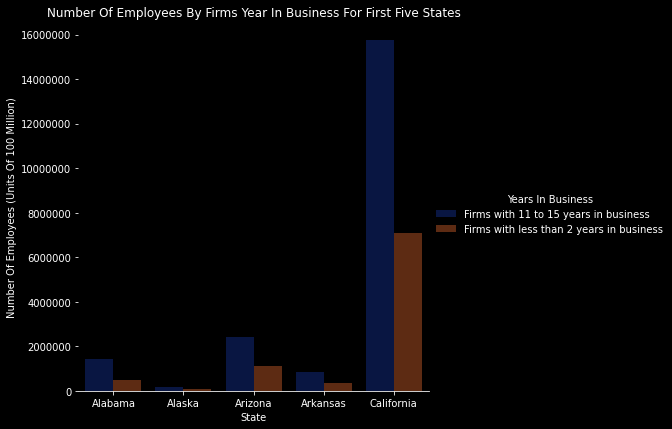

In [6]:
# Here is my first visualization using seaborn:
plt.style.use("dark_background")
q1 = q1[(q1['YEARS_IN_BUSINESS']=='Firms with less than 2 years in business') | (q1['YEARS_IN_BUSINESS']=='Firms with 11 to 15 years in business')]

g = sns.catplot(
    data=q1.head(10), kind="bar",
    x="STATE", y="NUMBER_OF_EMP", hue="YEARS_IN_BUSINESS",
    ci="sd", palette="dark", alpha=.6, height=6).set(title='Number Of Employees By Firms Year In Business For First Five States')

plt.ticklabel_format(style='plain', axis='y')
g.despine(left=True)
g.set_axis_labels("State", "Number Of Employees (Units Of 100 Million)")
g.legend.set_title("Years In Business")
# Here I am saving my visualization as a png
plt.savefig("FirstVisualizationLR.png")

This is where I create my tables for the second question:

In [7]:
q3 = c_summary_char_business_and_owners[['STATE','YEARS_IN_BUSINESS','NUMBER_OF_EMP']]

q3 = q3[q3.YEARS_IN_BUSINESS == 'All firms']

q3 = q3.groupby(['STATE','YEARS_IN_BUSINESS'],as_index = False)['NUMBER_OF_EMP'].sum()

q4 = c_summary_char_business_and_owners[['STATE','YEARS_IN_BUSINESS','NUM_OF_OWNERS_FOR_FIRM']]

q4 = q4[q4.YEARS_IN_BUSINESS == 'All firms']

q4 = q4.groupby(['STATE','YEARS_IN_BUSINESS'],as_index = False)['NUM_OF_OWNERS_FOR_FIRM'].sum()

q3
q4


,STATE,YEARS_IN_BUSINESS,NUM_OF_OWNERS_FOR_FIRM
0,Alabama,All firms,377770
1,Alaska,All firms,52938
2,Arizona,All firms,309345
3,Arkansas,All firms,332696
4,California,All firms,4093089
5,Colorado,All firms,577885
6,Connecticut,All firms,290272
7,Delaware,All firms,49997
8,District of Columbia,All firms,52497
9,Florida,All firms,1490952


Question 2: Is there a relationship between the number of owners for all firms and the number of employees?

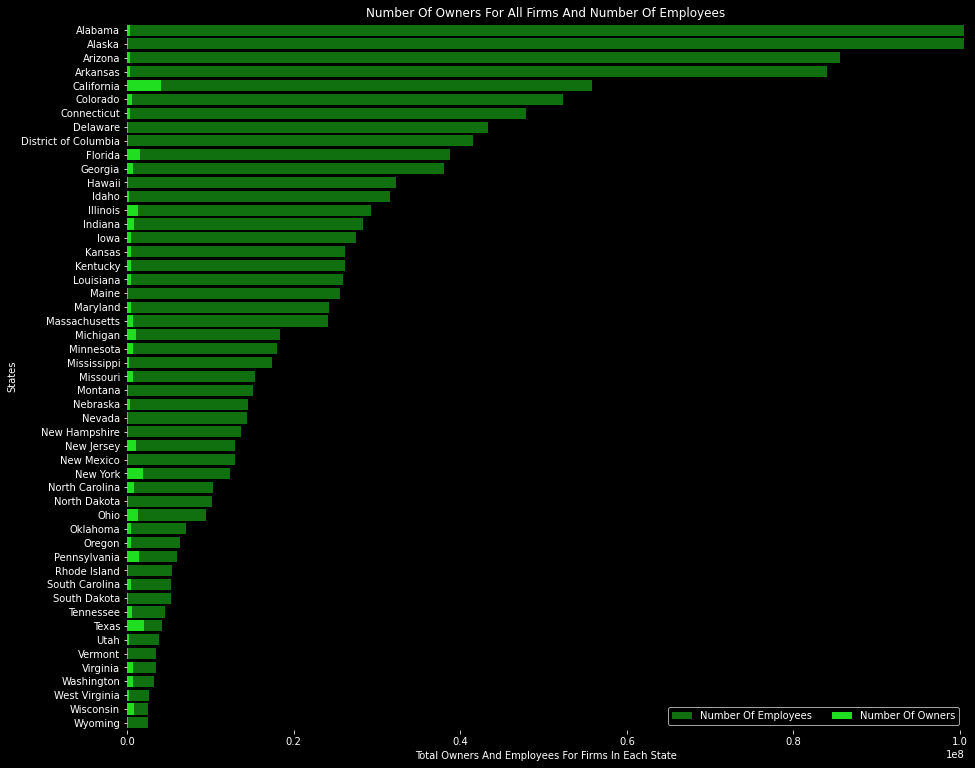

In [8]:
plt.style.use("dark_background")

# Initializing the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Sorting q3 data
q3 = q3.sort_values(by="NUMBER_OF_EMP", ascending=False )

# Plotting first barchart
sns.set_color_codes("muted")
sns.barplot(x="NUMBER_OF_EMP", y="STATE", data=q3,
            label="Number Of Employees", color="green",
            ci=None)

# Plotting second barchart 
sns.set_color_codes("pastel")
sns.barplot(x="NUM_OF_OWNERS_FOR_FIRM", y="STATE", data=q4,
            label="Number Of Owners", color="lime",
            ci=None)
plt.title("Number Of Owners For All Firms And Number Of Employees")

# Adding a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 100_500_000), ylabel="States",
       xlabel="Total Owners And Employees For Firms In Each State")
sns.despine(left=True, bottom=True)

plt.savefig("SecondVisualizationLR.png")



This is where I create my table for the last question:

In [9]:
q5 = c_summary_char_business_and_owners[['STATE','NUMBER_OF_EMP','YEARS_IN_BUSINESS','EMP_RACE']]

# I filtered to get just all firms:

q5 = q5[q5.YEARS_IN_BUSINESS == 'All firms']

# Then I filtered to get just all minorities:

q5 = q5[q5.EMP_RACE == 'Minority']

# This is how I can filter by two variables in a column:

# q5 = q5[(q5['STATE']=='White') | (q5['EMP_RACE']=='Minority')]

#Then I did the necessary grouping to make my dataframe look nice:

q5 = q5.groupby(['STATE','YEARS_IN_BUSINESS','EMP_RACE'],as_index = False)['NUMBER_OF_EMP'].sum()

#This is where I collect the first 25 states
q5 = q5.head(10)
q5


,STATE,YEARS_IN_BUSINESS,EMP_RACE,NUMBER_OF_EMP
0,Alabama,All firms,Minority,280763
1,Alaska,All firms,Minority,28099
2,Arizona,All firms,Minority,557720
3,Arkansas,All firms,Minority,97065
4,California,All firms,Minority,6805870
5,Colorado,All firms,Minority,363446
6,Connecticut,All firms,Minority,191648
7,Delaware,All firms,Minority,56054
8,District of Columbia,All firms,Minority,156577
9,Florida,All firms,Minority,2219974


Question 3: What is the total number of minority employees in all firms for the first 10 states?

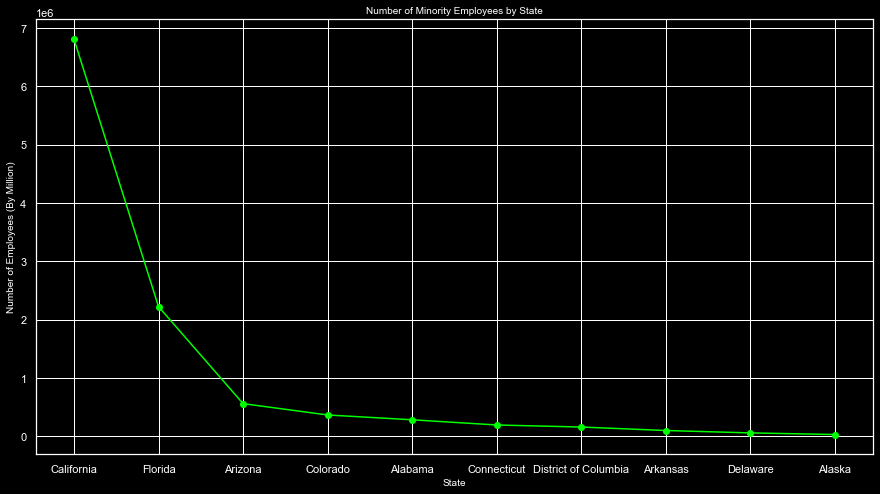

In [25]:
# This is where I start my third visualization
q5 = q5.sort_values(by="NUMBER_OF_EMP", ascending=False)
# I style it with the dark background, which I really like
plt.style.use("dark_background")
# Here I put the columns I will be using
plt.plot(q5['STATE'], q5['NUMBER_OF_EMP'], color='lime', marker='o')
# This deals with the parameters of my visualization
plt.rcParams["figure.figsize"] = (15,8)
# This is where I put the title
plt.title('Number of Minority Employees by State', fontsize=10)
# This is where I put the x-label
plt.xlabel('State', fontsize=10)
# This is where I put the y-label
plt.ylabel('Number of Employees (By Million)', fontsize=10)
# I include a grid in the background
plt.grid(True)
# I save it as a png
plt.savefig("ThirdVisualizationLR.png")
# This is to show it
plt.show()

In [11]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

def get_file(url):
    result = requests.get(url).json()
    final = pd.DataFrame(result)
    return final

#SETTING API SOURCES
c_summary = get_file("https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,EMP,PAYANN,RCPPDEMP,YIBSZFI,YIBSZFI_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,FIRMPDEMP&for=state:*&NAICS2017=00&key=a35b0cab138563036a49e8b976188a8c0e170e25")
char_business = get_file("https://api.census.gov/data/2018/abscb?get=NAME,GEO_ID,NAICS2017_LABEL,EMP,PAYANN,RCPPDEMP,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,FIRMPDEMP&for=state:*&NAICS2017=00&BUSCHAR=A1&QDESC=B01&key=a35b0cab138563036a49e8b976188a8c0e170e25")
char_business_owners = get_file("https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,OWNPDEMP&for=state:*&OWNCHAR=CG&NAICS2017=00&QDESC=O02&key=a35b0cab138563036a49e8b976188a8c0e170e25")
tech_char = get_file("https://api.census.gov/data/2018/abstcb?get=NAME,GEO_ID,NAICS2017_LABEL,EMP,FACTORS_P,IMPACTWF_P_LABEL,IMPACTWF_U_LABEL,FACTORS_U,PAYANN,MOTUSETECH,MOTUSETECH_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,TECHUSE,TECHUSE_LABEL,FIRMPDEMP&for=state:*&NAICS2017=00&key=a35b0cab138563036a49e8b976188a8c0e170e25")

#REPLACING COLUMNS WITH 1ST ROW NAMES
c_summary.columns = c_summary.iloc[0]
char_business.columns = char_business.iloc[0]
char_business_owners.columns = char_business_owners.iloc[0]
tech_char.columns = tech_char.iloc[0]

#REMOVING UNESSECARY ROW AFTER RENAMING COLUMNS
c_summary = c_summary.drop(c_summary.index[0])
char_business = char_business.drop(char_business.index[0])
char_business_owners = char_business_owners.drop(char_business_owners.index[0])
tech_char = tech_char.drop(tech_char.index[0])

WILL:

1. Some Merge garbage

In [12]:
# create merge points based on data fields likely to indicate singular business
c_summary["merge_tag_1"] = c_summary["GEO_ID"]+c_summary["ETH_GROUP"]+c_summary["SEX"]+c_summary["RACE_GROUP"]+c_summary["VET_GROUP"]
c_summary['merge_tag_2'] = c_summary["merge_tag_1"]+c_summary["EMP"]+c_summary["FIRMPDEMP"]+c_summary["PAYANN"]
char_business_owners["merge_tag_1"] = char_business_owners["GEO_ID"]+char_business_owners["OWNER_ETH"]+char_business_owners["OWNER_SEX"]+char_business_owners["OWNER_RACE"]+char_business_owners["OWNER_VET"]
char_business["merge_tag_2"] = char_business["GEO_ID"]+char_business["ETH_GROUP"]+char_business["SEX"]+char_business["RACE_GROUP"]+char_business["VET_GROUP"]+char_business["EMP"]+char_business["FIRMPDEMP"]+char_business["PAYANN"]
tech_char["merge_tag_2"] = tech_char["GEO_ID"]+tech_char["ETH_GROUP"]+tech_char["SEX"]+tech_char["RACE_GROUP"]+tech_char["VET_GROUP"]+tech_char["EMP"]+tech_char["FIRMPDEMP"]+tech_char["PAYANN"]

# clean data to be merged of columns with same names to only keep one copy in final DataFrame
cbo_cleaned=char_business_owners.drop(["NAME","state","GEO_ID","OWNER_ETH","OWNER_SEX","OWNER_RACE","OWNER_VET","NAICS2017_LABEL","OWNER_SEX_LABEL","OWNER_RACE_LABEL","OWNER_ETH_LABEL","OWNER_VET_LABEL","NAICS2017"],axis=1)
cbo_cleaned=cbo_cleaned.rename(columns={"QDESC":"QDESC_owner"})
cb_cleaned=char_business.drop(["NAME","state","GEO_ID","ETH_GROUP","SEX","RACE_GROUP","VET_GROUP","EMP","FIRMPDEMP","PAYANN","NAICS2017_LABEL","RCPPDEMP","SEX_LABEL","RACE_GROUP_LABEL","ETH_GROUP_LABEL","VET_GROUP_LABEL","NAICS2017"],axis=1)
cb_cleaned=cb_cleaned.rename(columns={"QDESC":"QDESC_business"})
tcb_cleaned=tech_char.rename(columns={"NAME":"NAME_Tech","state":"state_Tech","GEO_ID":"GEO_ID_Tech","ETH_GROUP":"ETH_GROUP_Tech","SEX":"SEX_Tech","RACE_GROUP":"RACE_GROUP_Tech","VET_GROUP":"VET_GROUP_Tech","EMP":"EMP_Tech","FIRMPDEMP":"FIRMPDEMP_Tech","PAYANN":"PAYANN_Tech","NAICS2017_LABEL":"NAICS2017_Tech","SEX_LABEL":"SEX_LABEL_Tech","RACE_GROUP_LABEL":"RACE_GROUP_LABEL_Tech","ETH_GROUP_LABEL":"ETH_GROUP_LABEL_Tech","VET_GROUP_LABEL":"VET_GROUP_LABEL_Tech","NAICS2017":"NAICS2017_Tech"})

# merge the various DataFrames together one at a time using outer merge to keep all data
cs_cb_merge=c_summary.merge(cb_cleaned,how='outer',on='merge_tag_2')
cs_cb_tcb_merge=cs_cb_merge.merge(tcb_cleaned,how='outer',on='merge_tag_2')
cs_cb_cbo_tcb_merge=cs_cb_tcb_merge.merge(cbo_cleaned,how="outer",on="merge_tag_1")

# remove the created merge points as they have served their purpose
cs_cb_cbo_tcb_merge.drop(["merge_tag_1"],axis=1,inplace=True)

2. I wanted to look at the impact of Owner Sex on employee compensation, and had liked using the RCPPDEMP data, but that column is 0 at state level so I needed to get us data and merge it, as follows:

In [13]:
# get national data by same process as general code
c_summary_US = get_file("https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*&key=4bd66954c86bd0a6ba524b9766beb04e32b367f6")
c_summary_US.columns = c_summary_US.iloc[0]
c_summary_US = c_summary_US.drop(c_summary_US.index[0])

# create merge point as in the garbage section
c_summary_US['merge_tag_2']=c_summary_US["GEO_ID"]+c_summary_US["ETH_GROUP"]+c_summary_US["SEX"]+c_summary_US["RACE_GROUP"]+c_summary_US["VET_GROUP"]+c_summary_US["EMP"]+c_summary_US["FIRMPDEMP"]+c_summary_US["PAYANN"]

# restrict to desired columns
us_EMP_PAY_RCP_SEX=c_summary_US[['EMP','PAYANN','RCPPDEMP','SEX_LABEL','merge_tag_2']]
us_EMP_PAY_RCP_SEX=us_EMP_PAY_RCP_SEX.rename(columns={'EMP':'EMP_US','PAYANN':'PAYANN_US','RCPPDEMP':'RCPPDEMP_US','SEX_LABEL':'SEX_LABEL_US'})

# merge new data with old (no overlaps as state and national don't mesh)
us_merge=cs_cb_cbo_tcb_merge.merge(us_EMP_PAY_RCP_SEX,how="outer",on="merge_tag_2")


3. Clean up the data removing unnecessary items and zeros

In [14]:
# turn columns from strings to numbers
us_PAY=pd.to_numeric(us_merge.PAYANN_US)
us_RCP=pd.to_numeric(us_merge.RCPPDEMP_US)
us_EMP=pd.to_numeric(us_merge.EMP_US)
state_PAY=pd.to_numeric(us_merge.PAYANN)
us_merge['PAYANN_US']=us_PAY
us_merge["RCPPDEMP_US"]=us_RCP
us_merge['EMP_US']=us_EMP
us_merge['PAYANN']=state_PAY

# remove unwanted items from SEX_LABELS(various editions due to the merges)
cleaner_us_merge=us_merge[us_merge.SEX_LABEL_US!="Classifiable"]
cleaner_us_merge=cleaner_us_merge[cleaner_us_merge.SEX_LABEL_US!="Unclassifiable"]
cleaner_us_merge=cleaner_us_merge[cleaner_us_merge.SEX_LABEL_US!="Total"]
cleaner_us_merge=cleaner_us_merge[cleaner_us_merge.SEX_LABEL!="Classifiable"]
cleaner_us_merge=cleaner_us_merge[cleaner_us_merge.SEX_LABEL!="Unclassifiable"]
cleaner_us_merge=cleaner_us_merge[cleaner_us_merge.SEX_LABEL!="Total"]

# last cleaning and splitting data for visualizations
only_us_merge=cleaner_us_merge[cleaner_us_merge.PAYANN_US>0]
only_us_merge=only_us_merge[only_us_merge.RCPPDEMP_US>0]
only_us_merge=only_us_merge[only_us_merge.EMP_US>0]
us_merge_CS_PAY_GT0=cleaner_us_merge[cleaner_us_merge.PAYANN>0]
more_cleaner_us_merge=only_us_merge[["EMP_US","PAYANN_US","RCPPDEMP_US","SEX_LABEL_US"]]

4. Visualizations Work

4. a) boxplot

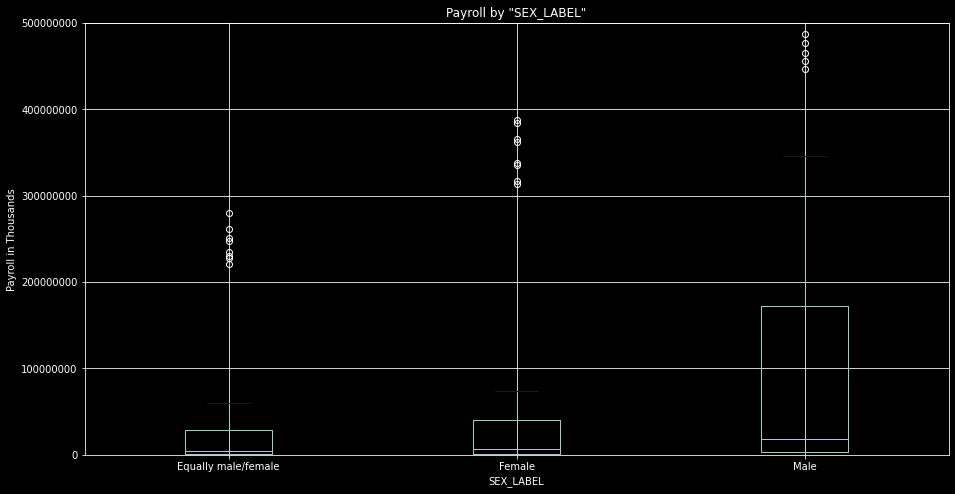

In [15]:
axbxp=more_cleaner_us_merge.boxplot(column='PAYANN_US',by='SEX_LABEL_US')
plt.rcParams["figure.figsize"] = (8,4)
fig1=axbxp.get_figure()
fig1.suptitle("")
plt.xlabel('SEX_LABEL')
plt.ylabel('Payroll in Thousands')
plt.ylim([0,500_000_000])     #y limit
plt.title('Payroll by "SEX_LABEL"')
plt.ticklabel_format(style='plain', axis='y')

4. b) two bar graphs of median PAYANN by SEX_LABEL, one from state data and another from the us data I imported

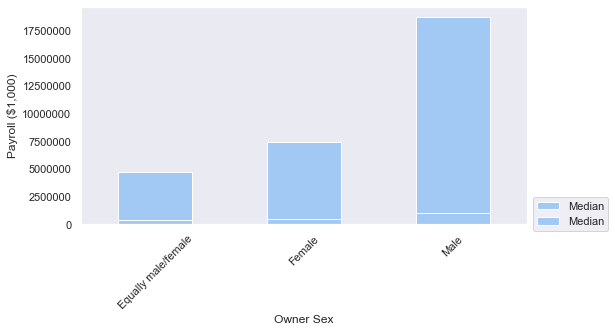

In [16]:
# US data bar graph
us_stats=more_cleaner_us_merge.groupby('SEX_LABEL_US')['PAYANN_US'].describe()
us_stats=us_stats.rename(columns={"50%":"Median"})
us_stats_median=us_stats['Median']
sns.set_theme(style="dark", palette='pastel')
axbar1 = us_stats_median.plot.bar()
plt.legend(bbox_to_anchor=(1,0.15), loc="upper left")
axbar1.set_xlabel('Owner Sex')
axbar1.set_ylabel('Payroll ($1,000)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

# State data bar graph
state_stats=us_merge_CS_PAY_GT0.groupby('SEX_LABEL')['PAYANN'].describe()
state_stats=state_stats.rename(columns={"50%":"Median"})
state_stats_median=state_stats['Median']
sns.set_theme(style="dark", palette='pastel')
axbar2 = state_stats_median.plot.bar()
plt.legend(bbox_to_anchor=(1,0.15), loc="upper left")
axbar2.set_xlabel('Owner Sex')
axbar2.set_ylabel('Payroll ($1,000)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')

4. c) two scatter plots comparing Sales vs Employees and Payroll vs Sales for the US data seriesed by SEX_LABEL

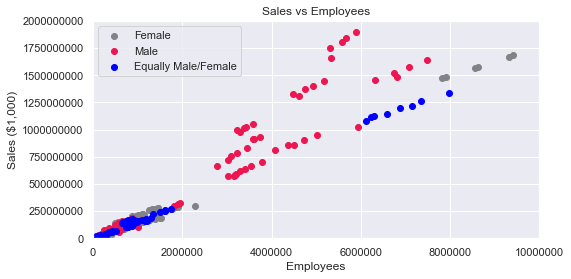

In [17]:
# code to split series
us_Male=more_cleaner_us_merge[more_cleaner_us_merge["SEX_LABEL_US"]=="Male"]
us_Female=more_cleaner_us_merge[more_cleaner_us_merge["SEX_LABEL_US"]=="Female"]
us_Equal=more_cleaner_us_merge[more_cleaner_us_merge["SEX_LABEL_US"]=="Equally male/female"]
us_Male_PAY=us_Male['PAYANN_US']
us_Male_RCP=us_Male['RCPPDEMP_US']
us_Male_EMP=us_Male['EMP_US']
us_Female_PAY=us_Female['PAYANN_US']
us_Female_RCP=us_Female['RCPPDEMP_US']
us_Female_EMP=us_Female['EMP_US']
us_Equal_PAY=us_Equal['PAYANN_US']
us_Equal_RCP=us_Equal['RCPPDEMP_US']
us_Equal_EMP=us_Equal['EMP_US']

# first scatter plot, Sales vs Employees
sns.set_theme(style="darkgrid", palette='pastel')
plt.scatter(x=us_Female_EMP,y=us_Female_RCP,c='#838286',label='Female')
plt.scatter(x=us_Male_EMP,y=us_Male_RCP,c='#ed1650',label='Male')
plt.scatter(x=us_Equal_EMP,y=us_Equal_RCP,color='blue',label='Equally Male/Female')
plt.title("Sales vs Employees")
plt.xlabel("Employees")
plt.xlim([0,10_000_000])
plt.ylim([0,2_000_000_000])
plt.ticklabel_format(style = "plain")
plt.ylabel("Sales ($1,000)")
plt.legend(loc=2)
#plt.rcParams["figure.figsize"] = (6,4)
plt.show()

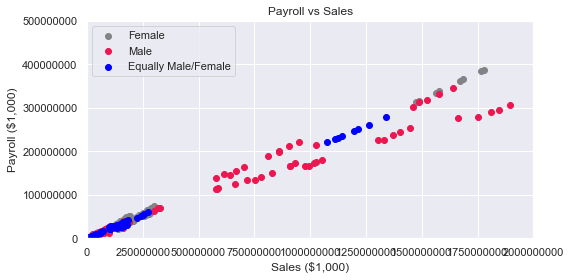

In [18]:
#second scatter plot, Payroll vs Sales
plt.scatter(x=us_Female_RCP,y=us_Female_PAY,c='#838286',label='Female')
plt.scatter(x=us_Male_RCP,y=us_Male_PAY,c='#ed1650',label='Male')
plt.scatter(x=us_Equal_RCP,y=us_Equal_PAY,color='blue',label='Equally Male/Female')
plt.title("Payroll vs Sales")
plt.xlabel("Sales ($1,000)")
plt.ylim([0,500_000_000])
plt.xlim([0,2_000_000_000])
plt.ticklabel_format(style = "plain")
plt.ylabel("Payroll ($1,000)")
plt.legend(loc=2)
#plt.rcParams["figure.figsize"] = (10,6)
plt.show()

PHIL:

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

def get_file(url):
    result = requests.get(url).json()
    final = pd.DataFrame(result)
    return final

#SETTING API SOURCES
c_summary = get_file("https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,EMP,PAYANN,RCPPDEMP,YIBSZFI,YIBSZFI_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,FIRMPDEMP&for=state:*&NAICS2017=00&key=6de172b3ccc6f1bf35df97842b21f63fd1d9f474")
char_business = get_file("https://api.census.gov/data/2018/abscb?get=NAME,GEO_ID,NAICS2017_LABEL,EMP,PAYANN,RCPPDEMP,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,FIRMPDEMP&for=state:*&NAICS2017=00&BUSCHAR=A1&QDESC=B01&key=6de172b3ccc6f1bf35df97842b21f63fd1d9f474")
char_business_owners = get_file("https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,OWNPDEMP&for=state:*&OWNCHAR=CG&NAICS2017=00&QDESC=O02&key=6de172b3ccc6f1bf35df97842b21f63fd1d9f474")
tech_char = get_file("https://api.census.gov/data/2018/abstcb?get=NAME,GEO_ID,NAICS2017_LABEL,EMP,FACTORS_P,IMPACTWF_P_LABEL,IMPACTWF_U_LABEL,FACTORS_U,PAYANN,MOTUSETECH,MOTUSETECH_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,TECHUSE,TECHUSE_LABEL,FIRMPDEMP&for=state:*&NAICS2017=00&key=6de172b3ccc6f1bf35df97842b21f63fd1d9f474")

#REPLACING COLUMNS WITH 1ST ROW NAMES
c_summary.columns = c_summary.iloc[0]
char_business.columns = char_business.iloc[0]
char_business_owners.columns = char_business_owners.iloc[0]
tech_char.columns = tech_char.iloc[0]

#REMOVING UNESSECARY ROW AFTER RENAMING COLUMNS
c_summary = c_summary.drop(c_summary.index[0])
char_business = char_business.drop(char_business.index[0])
char_business_owners = char_business_owners.drop(char_business_owners.index[0])
tech_char = tech_char.drop(tech_char.index[0])

In [ ]:
## Male Employees by State: FINAL

c_summary_male = c_summary[c_summary.SEX_LABEL == 'Male'][c_summary.ETH_GROUP_LABEL == 'Total'][c_summary.RACE_GROUP_LABEL == 'Total'][c_summary.VET_GROUP_LABEL == 'Total']
c_summary_male = c_summary_male.astype({'NAME': 'string', 'EMP':'int64', 'SEX_LABEL':'string'})
c_summary_male = c_summary_male.groupby('NAME')['EMP'].sum()
c_summary_male = c_summary_male.nlargest(10)

male_ax = c_summary_male.plot(title = 'Male Employees by State: Top 10', x = 'NAME', y = 'EMP', kind = 'bar', figsize = (15,8))

In [ ]:
## Female Employees by State: FINAL

c_summary_female = c_summary[c_summary.SEX_LABEL == 'Female'][c_summary.ETH_GROUP_LABEL == 'Total'][c_summary.RACE_GROUP_LABEL == 'Total'][c_summary.VET_GROUP_LABEL == 'Total']
c_summary_female = c_summary_female.astype({'NAME': 'string', 'EMP':'int64', 'SEX_LABEL':'string'})
c_summary_female = c_summary_female.groupby('NAME')['EMP'].sum()
c_summary_female = c_summary_female.nlargest(10)

female_ax = c_summary_female.plot(title = 'Female Employees by State: Top 10', x = 'NAME', y = 'EMP', kind = 'bar', figsize = (15,8))

SHARIF:

In [19]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

def get_file(url):
    result = requests.get(url).json()
    final = pd.DataFrame(result)
    return final

#SETTING API SOURCES
c_summary = get_file("https://api.census.gov/data/2018/abscs?get=NAME,RCPSZFI,RCPSZFI_LABEL,EMPSZFI,EMPSZFI_LABEL,GEO_ID,NAICS2017_LABEL,EMP,PAYANN,RCPPDEMP,YIBSZFI,YIBSZFI_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,FIRMPDEMP&for=state:*&NAICS2017=00&key=a35b0cab138563036a49e8b976188a8c0e170e25")
char_business = get_file("https://api.census.gov/data/2018/abscb?get=NAME,GEO_ID,NAICS2017_LABEL,EMP,PAYANN,RCPPDEMP,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,FIRMPDEMP&for=state:*&NAICS2017=00&BUSCHAR=A1&QDESC=B01&key=a35b0cab138563036a49e8b976188a8c0e170e25")
char_business_owners = get_file("https://api.census.gov/data/2018/abscbo?get=NAME,OWNCHAR,OWNCHAR_LABEL,GEO_ID,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,OWNPDEMP&for=state:*&OWNCHAR=CG&NAICS2017=00&QDESC=O02&key=a35b0cab138563036a49e8b976188a8c0e170e25")
tech_char = get_file("https://api.census.gov/data/2018/abstcb?get=NAME,GEO_ID,NAICS2017_LABEL,EMP,FACTORS_P,IMPACTWF_P_LABEL,IMPACTWF_U_LABEL,FACTORS_U,PAYANN,MOTUSETECH,MOTUSETECH_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,TECHUSE,TECHUSE_LABEL,FIRMPDEMP&for=state:*&NAICS2017=00&key=a35b0cab138563036a49e8b976188a8c0e170e25")

#REPLACING COLUMNS WITH 1ST ROW NAMES
c_summary.columns = c_summary.iloc[0]
char_business.columns = char_business.iloc[0]
char_business_owners.columns = char_business_owners.iloc[0]
tech_char.columns = tech_char.iloc[0]

#REMOVING UNESSECARY ROW AFTER RENAMING COLUMNS
c_summary = c_summary.drop(c_summary.index[0])
char_business = char_business.drop(char_business.index[0])
char_business_owners = char_business_owners.drop(char_business_owners.index[0])
tech_char = tech_char.drop(tech_char.index[0])

In [20]:
# NARROWING DOWN TO USEFUL COLUMNS
c_summary = c_summary[['NAME','RCPSZFI_LABEL','EMP','PAYANN','YIBSZFI_LABEL','EMPSZFI_LABEL','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL','FIRMPDEMP']]
char_business = char_business[['NAME','EMP','PAYANN','FIRMPDEMP']]
char_business_owners =char_business_owners[['NAME','OWNPDEMP']]
tech_char = tech_char[['NAME','EMP','PAYANN','FIRMPDEMP']]


#CHANGING COLUMNS' DATATYPE FROM OBJECT TO APPROPRIATE TYPE 
c_summary = c_summary.astype({"NAME":"string", "EMP": "int64",'RCPSZFI_LABEL':'string',"PAYANN": "int64","YIBSZFI_LABEL": "string",'EMPSZFI_LABEL':'string',"SEX_LABEL":"string","ETH_GROUP_LABEL":"string", "VET_GROUP_LABEL": "string", "FIRMPDEMP": "int64","RACE_GROUP_LABEL":"string"}, errors='ignore')
char_business = char_business.astype({"NAME":"string", "EMP": "int64","PAYANN": "int64","FIRMPDEMP": "int64",}, errors='ignore')
char_business_owners = char_business_owners.astype({"NAME":"string","OWNPDEMP":"int64" }, errors='ignore')
tech_char = tech_char.astype({"NAME":"string","PAYANN":"int64"}, errors='ignore')

#RENAMING COLUMNS
c_summary = c_summary.rename(columns={'NAME':'State','RCPSZFI_LABEL':'Revenue','EMP':'NumberOfEmployees','PAYANN':'AnnualPayroll','YIBSZFI_LABEL':'YearsInBussiness','EMPSZFI_LABEL':'EmpSizeFirm','SEX_LABEL':'Gender','ETH_GROUP_LABEL':'Ethnicity','RACE_GROUP_LABEL':'Race','VET_GROUP_LABEL':'VeteranStatus','FIRMPDEMP':'NumberEmpFirms'})
char_business = char_business.rename(columns={'NAME':'State','EMP':'NumEmployeesOfRespondentFirm','PAYANN':'RespondendtFirmAnnualPayroll','FIRMPDEMP':'NumRespondentEmpFirms'})
char_business_owners = char_business_owners.rename(columns={'NAME':'State','OWNPDEMP':'NumRespondentFirmOwners'})
tech_char = tech_char.rename(columns={'NAME':'State','EMP':'NumTechEmployees','PAYANN':'TechAnnualPayroll','FIRMPDEMP':'NumTechFirms'})

# merging all tables while using c_summary (Compay Summary) as base table
c_summary = c_summary.merge(char_business, how='left', on='State')
c_summary = c_summary.merge(char_business_owners, how='left', on='State')

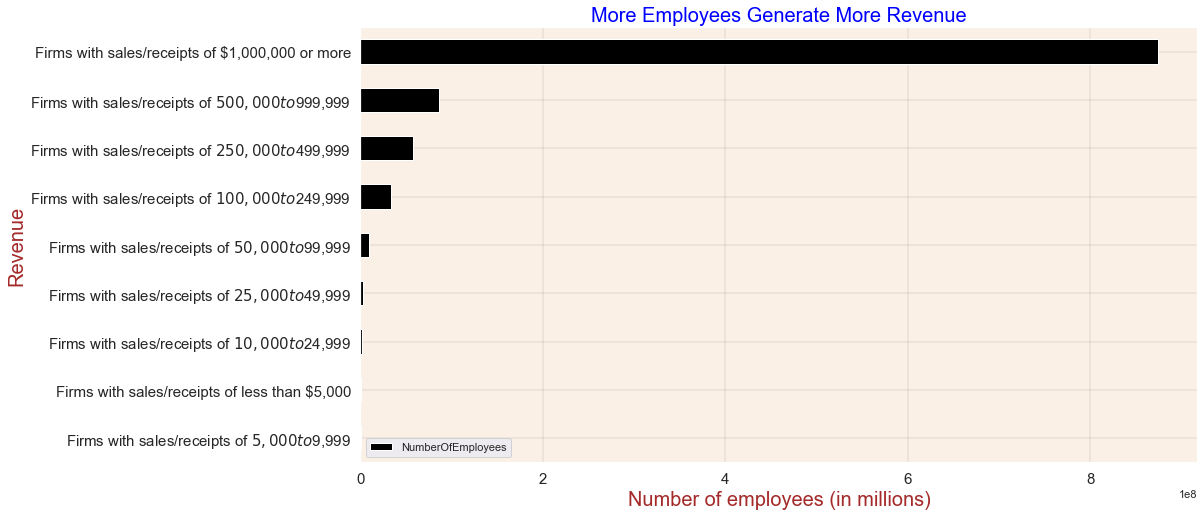

In [21]:
# Hypothethis #1. Companies with higher number of employees generate higher revenue (bar)
#filtering to necessary columns
hp1 = c_summary[['Revenue','NumberOfEmployees']] 
#grouping columns based on Revenue and sum of Number of Employees column
hp1 = hp1.groupby(['Revenue']).NumberOfEmployees.apply(lambda x: x.sum())
#sorting results from high to low
hp1 = hp1.sort_values()
# removing total firms row
hp1 = hp1.drop('All firms')
# converting series to Dataframe
hp1 = pd.DataFrame(hp1)

#creating visual using matplotlib.pyplot library
ax = hp1.plot(figsize=(15,8), fontsize=15, kind='barh', color='black', rot=0)
ax.set_xlabel('Number of employees (in millions)', fontsize=20, color='brown')
ax.set_ylabel('Revenue', fontsize=20, color='brown')
ax.set_title('More Employees Generate More Revenue', fontsize=20, color='blue')
ax.grid(which='major',color='black', linewidth='0.1')
ax.set_facecolor('linen')
plt.savefig("EmployeesRevenue.png")
plt.show()

C:\Users\Luis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


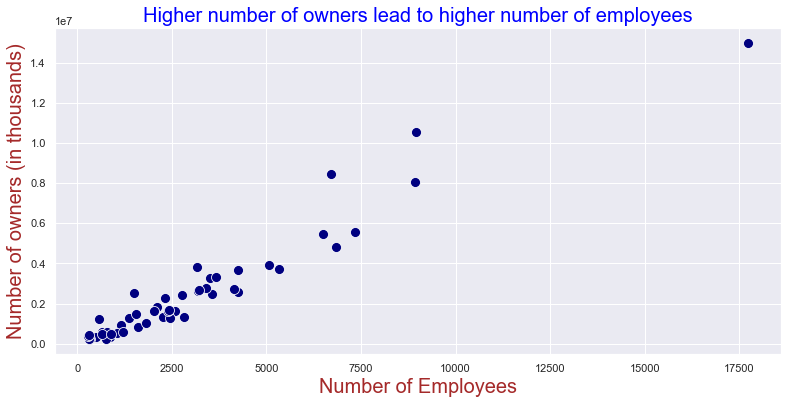

In [22]:
# Hypothethis #2. Higher number of owners lead to higher number of employees (correlation)

#filtering to necessary columns
hp2 = c_summary[['NumRespondentFirmOwners','NumEmployeesOfRespondentFirm']]
#removing duplicates
hp2 = hp2.drop_duplicates()

#creating scatter plot using seaborn libray
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
sns.scatterplot(hp2.NumRespondentFirmOwners, hp2.NumEmployeesOfRespondentFirm, s=100, alpha=1, color='navy')
plt.xlabel('Number of Employees', color='brown', fontsize='20')
plt.ylabel('Number of owners (in thousands)', color='brown', fontsize='20')
plt.title('Higher number of owners lead to higher number of employees', fontsize=20, color='blue')
plt.savefig("2nd visual.png")

<Figure size 720x576 with 0 Axes>

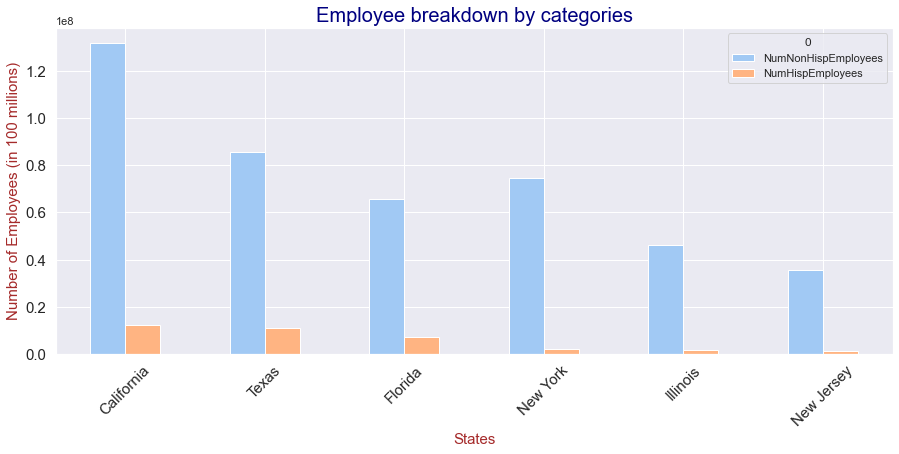

In [23]:
# Hypothethis #3. Ethnicity categories don't heve same share in total number of employees. 
#5 states with highest # of employees, broken by Hipanic and Nun-hispanic categories

#filtering to necessary columns
hp3 = c_summary[['State','NumberOfEmployees','Ethnicity']]
#find all hispanic employees by filtering row to 'Hisanic' values and removing duplicates
hisp = hp3[hp3.Ethnicity =='Hispanic'].drop_duplicates()
#renaming employees column to Hisp Employees
hisp = hisp.rename(columns={'NumberOfEmployees':'NumHispEmployees'})
#grouping colums based on State columns and sum of employees. Returning 5 largest states
hisp = hisp.groupby(['State'], as_index=False).NumHispEmployees.sum().nlargest(10, 'NumHispEmployees')
#converting series to DataFrame
hisp = pd.DataFrame(hisp)


#find all non-Hispanic employees by filtering rows to 'Non-Hispanic'
non_hisp = hp3[hp3.Ethnicity =='Non-Hispanic'].drop_duplicates()
#renaming employee column to Non Hisp Employees
non_hisp = non_hisp.rename(columns={'NumberOfEmployees':'NumNonHispEmployees'})
#grouping colums based on State columns and sum of employees. Returning 5 largest states
non_hisp = non_hisp.groupby(['State'], as_index=False).NumNonHispEmployees.sum().nlargest(10, 'NumNonHispEmployees')
#converting series to FataFrame
non_hisp = pd.DataFrame(non_hisp)

#merge both tables
final = hisp.merge(non_hisp, how='inner', on='State')

#creating clusteres bar chart
plt.figure(figsize=(10, 8))
ax=final.plot(x='State', y=['NumNonHispEmployees','NumHispEmployees'], kind='bar', rot=45, fontsize=15,figsize=(15, 6))
ax.set_title('Employee breakdown by categories', fontsize=20, color='navy')
ax.set_xlabel('States', fontsize=15, color='brown')
ax.set_ylabel('Number of Employees (in 100 millions)', fontsize=15, color='brown')
plt.savefig("3rd visual.png")